In [27]:
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.constants import R_sun

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'family' : 'courier',
        'weight' : 'normal',
        'size'   : 14}



In [39]:
IDs = [( "TIC277539431", "b"), ("TIC237880881", "k"), ("TIC44984200", "r"),("KIC100004076", "orange")]

Text(0.5, 0, '$i$ [deg]')

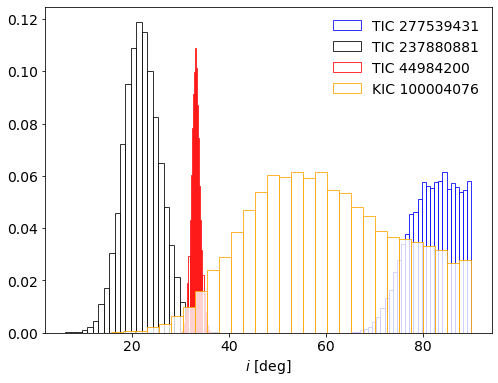

In [40]:
plt.figure(figsize=(8,6))
for ID, c in IDs:
    df = pd.read_csv(f"../../data/inclinations/{ID}_post.dat", header=None, delimiter="\s+")

    arr = df.to_numpy().flatten()

    counts, bins = np.histogram(arr, bins=30)
    mids = (bins[1:] + bins[:-1]) / 2.
    width = bins[1] - bins[0]

    plt.bar(mids, counts/len(arr), width=width, label=f"{ID[:3]} {ID[3:]}", edgecolor=c, color="w",alpha=.8)
plt.legend(frameon=False, fontsize=14)
plt.xlabel(r"$i$ [deg]", fontsize=14)

In [17]:
from astropy.modeling.models import Gaussian1D
from astropy.modeling import fitting

np.random.seed(0)
x = mids
y = counts.astype(float)/len(arr)
g1 = Gaussian1D(amplitude=.2, mean=85, stddev=5)
g1.bounding_box.amplitude = (0, 1.) #I am not sure this format is right because I cannot find an example in astropy
g1.bounding_box.mean = (0,90)
g2 = Gaussian1D(amplitude=0.05, mean=88, stddev=25)
g2.bounding_box.amplitude = (.0, 1.)
g2.bounding_box.mean = (0,90)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g1+g2, x, y)#

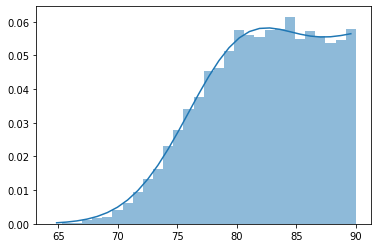

In [18]:
plt.bar(mids, counts/len(arr), width=width, alpha=0.5)
plt.plot(x, g(x))

In [19]:
path = "../../data/inclinations/277539431_post_compound.p"
pickle.dump( g, open( path, "wb" ) )